In [3]:
# Student Name: Aaron Baggot
# Student Number: C22716399
# Segmentation: Task 2

# Instructions
# 1. Open image “Orange.png”;
# 2. Using thresholding, create a mask with the orange as ROI;
# 3. Use this mask to extract the orange from the image;
# 4. Open “Water.jpg”;
# Use the inverse of the orange mask to cut an orange-shaped hole in
# the water picture;
# 6. Combine the orange and water masked images to create a
# composite image.

# Hue (H)	0	20	Includes red, orange, and some yellow tones — the range where most skin hues fall.
# Saturation (S)	10	255	Avoids very gray or dull colors (too low saturation) and allows full color intensity.
# Value (V)	10	255	Excludes very dark pixels (too low brightness) while including bright ones.

# Thois lab demonstrates using bitwise operations function in a binary manner and are represented as grayscale images [1]. How to apply bitwise AND, OR, XOR, and NOT with OpenCV [2].

# [1] A. Rosebrock, “Image Masking with OpenCV,” PyImageSearch. Accessed: Nov. 04, 2025. [Online]. Available: https://pyimagesearch.com/2021/01/19/image-masking-with-opencv/

# [2] A. Rosebrock, “OpenCV Bitwise AND, OR, XOR, and NOT,” PyImageSearch. Accessed: Nov. 05, 2025. [Online]. Available: https://pyimagesearch.com/2021/01/19/opencv-bitwise-and-or-xor-and-not/



In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
orange_path = Path("/Users/aaronbaggot/Desktop/image-processing-labs/data/samples/orange.png")
water_path = Path("/Users/aaronbaggot/Desktop/image-processing-labs/data/samples/water.jpg")

orange = cv2.imread(str(orange_path))
water = cv2.imread(str(water_path))

In [6]:
# Resize water to match orange size
water = cv2.resize(water, (orange.shape[1], orange.shape[0]))

In [7]:
# Convert orange to HSV
hsv = cv2.cvtColor(orange, cv2.COLOR_BGR2HSV)

# Define orange colour range
lower_orange = np.array([5, 100, 100])
upper_orange = np.array([25, 255, 255])

# Create mask for orange
mask = cv2.inRange(hsv, lower_orange, upper_orange)

# Invert the mask
mask_inv = cv2.bitwise_not(mask)

# Extract orange region
orange_roi = cv2.bitwise_and(orange, orange, mask=mask)

# Cut a hole in water
water_hole = cv2.bitwise_and(water, water, mask=mask_inv)

# Combine both to create composite
composite = cv2.add(water_hole, orange_roi)

# Convert to RGB for display
orange_rgb = cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)
water_rgb = cv2.cvtColor(water, cv2.COLOR_BGR2RGB)
composite_rgb = cv2.cvtColor(composite, cv2.COLOR_BGR2RGB)


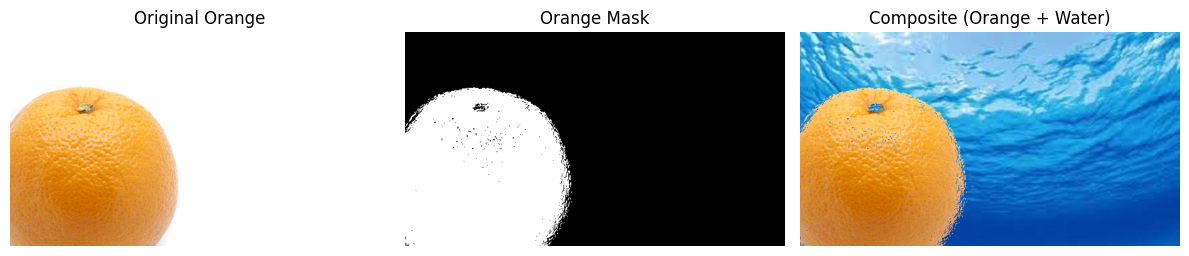

In [8]:
# Show results
plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.imshow(orange_rgb); plt.title("Original Orange"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(mask, cmap="gray"); plt.title("Orange Mask"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(composite_rgb); plt.title("Composite (Orange + Water)"); plt.axis("off")
plt.tight_layout()
plt.show()